In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az

from thesis_tools.utils.data import *
from thesis_tools.models.bayesian_univariate_time_series import *

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
df = read_panel_data(observations_threshold=50)
df = df[df['group'] == 'U.S.']  # Only use U.S. data

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_tools/utils/data.py:251: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_FTSE100['Date'] = pd.to_datetime(df_FTSE100['Date'])


In [3]:
df

,group,year,gdp_pc,CAC40,DAX,FTSE100,MOEX,MSCI,NIFTY,OMX40,...,log_change_CAC40,log_change_DAX,log_change_FTSE100,log_change_MOEX,log_change_MSCI,log_change_NIFTY,log_change_OMX40,log_change_SPX,log_change_SSE,constant
105,U.S.,2001,37133.623113,5998.490234,6795.140137,6297.53,NaN,1249.099976,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
106,U.S.,2002,37997.759657,4461.870117,5107.609863,5164.78,NaN,968.500000,NaN,NaN,...,-0.295940,-0.285476,-0.198295,NaN,-0.254430,NaN,NaN,-0.189500,-0.325531,1
107,U.S.,2003,39490.274956,2937.879883,2747.830078,3567.41,NaN,768.299988,NaN,NaN,...,-0.417880,-0.619920,-0.370023,NaN,-0.231568,NaN,NaN,-0.278230,0.005449,1
108,U.S.,2004,41724.631629,3638.439941,4058.600098,4390.68,NaN,1053.699951,NaN,NaN,...,0.213867,0.390027,0.207644,NaN,0.315883,NaN,NaN,0.279053,0.058851,1
109,U.S.,2005,44123.407068,3913.689941,4254.850098,4852.31,NaN,1155.599976,NaN,NaN,...,0.072926,0.047221,0.099971,NaN,0.092312,NaN,NaN,0.043373,-0.288708,1
110,U.S.,2006,46302.000880,4947.990234,5674.149902,5760.26,NaN,1297.300049,NaN,NaN,...,0.234501,0.287861,0.171528,NaN,0.115666,NaN,NaN,0.080332,0.054076,1
111,U.S.,2007,48050.223777,5608.310059,6789.109863,6203.09,NaN,1515.400024,NaN,NaN,...,0.125268,0.179399,0.074065,NaN,0.155394,NaN,NaN,0.116498,0.795167,1
112,U.S.,2008,48570.045980,4869.790039,6851.750000,5879.78,NaN,1486.400024,5137.450195,NaN,...,-0.141199,0.009184,-0.053528,NaN,-0.019322,NaN,NaN,-0.042388,0.453096,1
113,U.S.,2009,47194.943355,2973.919922,4338.350098,4149.64,NaN,838.799988,2874.800049,NaN,...,-0.493170,-0.457010,-0.348498,NaN,-0.572140,-0.580574,NaN,-0.512338,-0.789358,1
114,U.S.,2010,48650.643128,3739.459961,5608.790039,5188.52,NaN,1119.500000,4882.049805,NaN,...,0.229060,0.256841,0.223427,NaN,0.288665,0.529582,NaN,0.262575,0.406572,1


In [4]:
model = Univariate_Weibull_TimeSeries(
    panel_df=df
)

Panel is too long, truncating to 15 years


In [5]:
model.fit(target_accept=0.975, tune=1000, draws=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_variance_constant, beta_constant, beta_variance_log_change_gdp_pc, beta_log_change_gdp_pc, beta_variance_log_change_MSCI, beta_log_change_MSCI, gamma, alpha_2008, epsilon_sigma, epsilon_2009, epsilon_2010, epsilon_2011, epsilon_2012, epsilon_2013, epsilon_2014, epsilon_2015, epsilon_2016, epsilon_2017, epsilon_2018, epsilon_2019, epsilon_2020, epsilon_2021, epsilon_2022]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 563 seconds.
There were 31 divergences after tuning. Increase `target_accept` or reparameterize.


In [6]:
trace = model.get_trace()

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (37), generating only 20 plots
  warnings.warn(


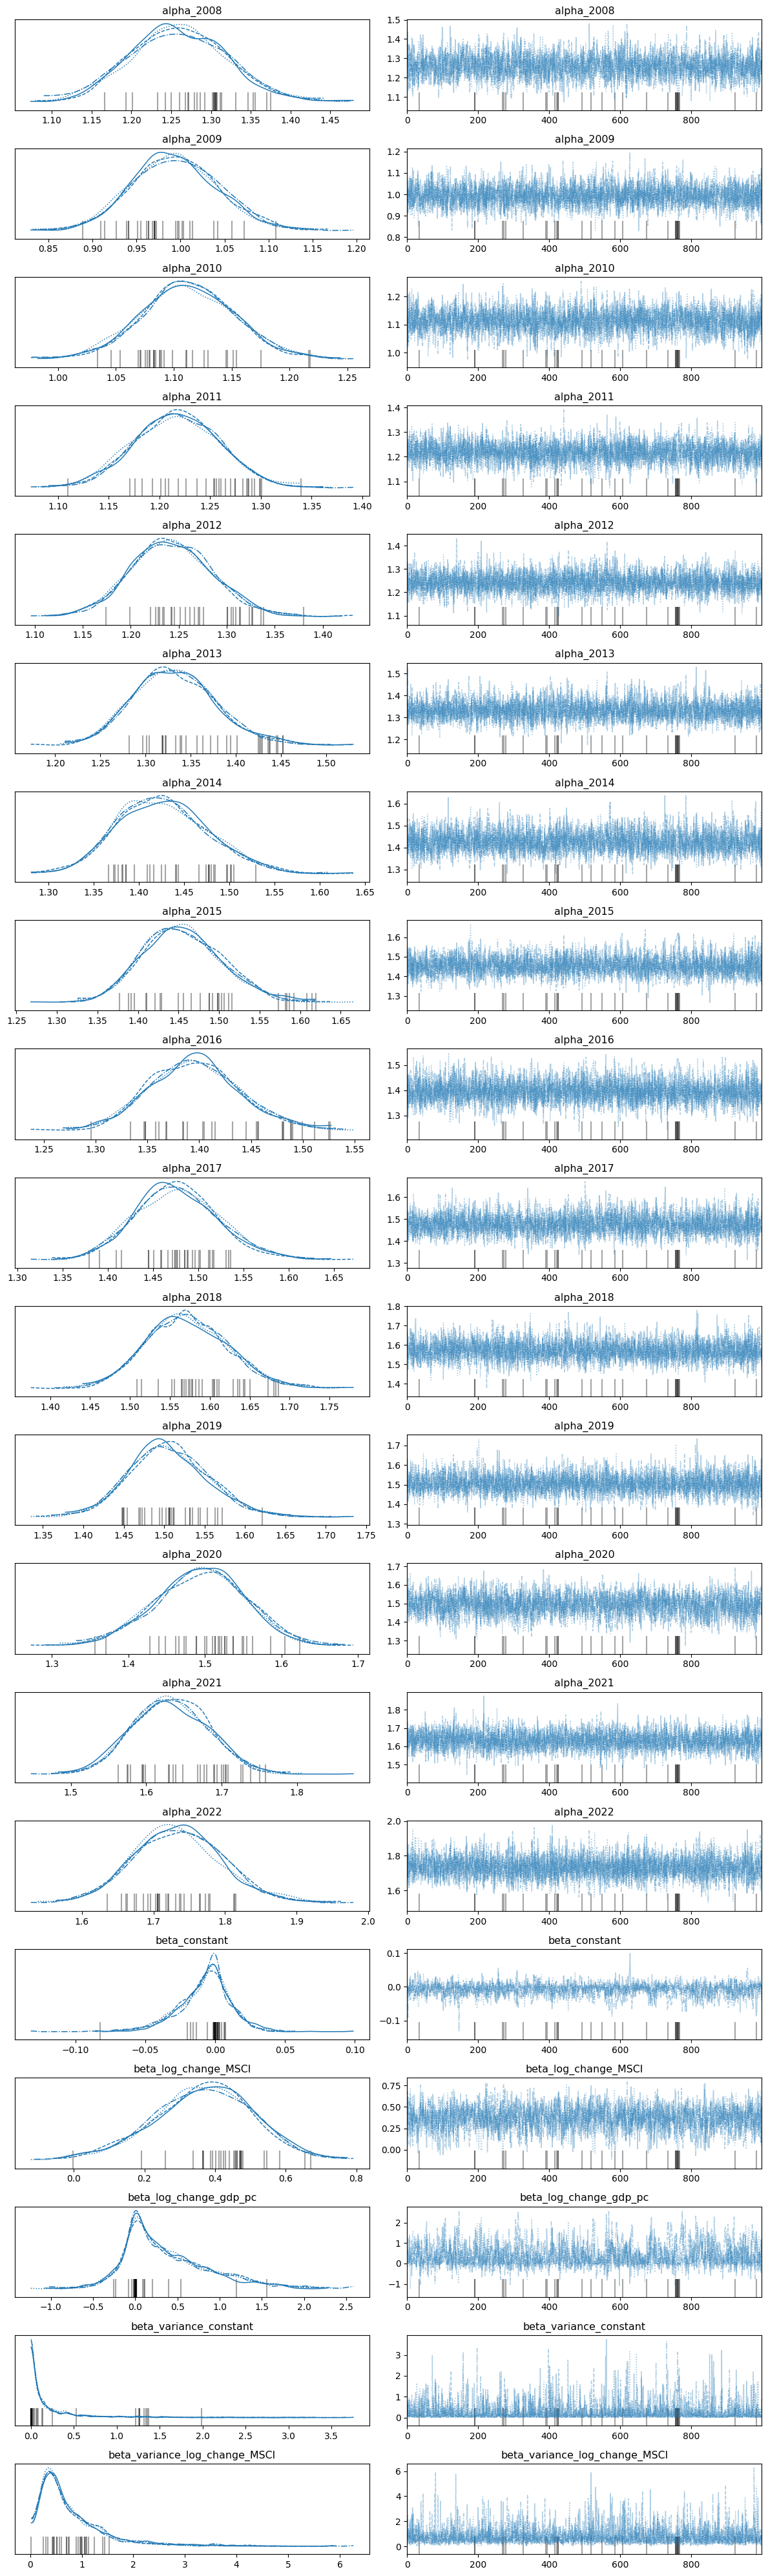

In [7]:
az.plot_trace(trace)
plt.tight_layout()

In [8]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha_2008,1.260,0.061,1.143,1.369,0.001,0.001,2894.0,2838.0,1.0
alpha_2009,0.994,0.049,0.901,1.084,0.001,0.001,3029.0,2611.0,1.0
alpha_2010,1.112,0.040,1.038,1.191,0.001,0.001,2663.0,3223.0,1.0
alpha_2011,1.217,0.042,1.142,1.299,0.001,0.001,2728.0,2482.0,1.0
alpha_2012,1.243,0.043,1.163,1.322,0.001,0.000,4829.0,3024.0,1.0
alpha_2013,1.332,0.045,1.247,1.417,0.001,0.001,3472.0,2125.0,1.0
alpha_2014,1.427,0.050,1.341,1.526,0.001,0.001,3114.0,3556.0,1.0
alpha_2015,1.455,0.049,1.370,1.551,0.001,0.001,3078.0,2045.0,1.0
alpha_2016,1.396,0.045,1.316,1.487,0.001,0.001,3934.0,2279.0,1.0
alpha_2017,1.477,0.046,1.390,1.561,0.001,0.001,4009.0,3334.0,1.0


In [10]:
self_model = model.model
trace = model.trace

In [11]:
with self_model:
    prior = pm.sample_prior_predictive(samples=1000)

Sampling: [alpha_2008, beta_constant, beta_log_change_MSCI, beta_log_change_gdp_pc, beta_variance_constant, beta_variance_log_change_MSCI, beta_variance_log_change_gdp_pc, epsilon_2009, epsilon_2010, epsilon_2011, epsilon_2012, epsilon_2013, epsilon_2014, epsilon_2015, epsilon_2016, epsilon_2017, epsilon_2018, epsilon_2019, epsilon_2020, epsilon_2021, epsilon_2022, epsilon_sigma, gamma, y_2008, y_2009, y_2010, y_2011, y_2012, y_2013, y_2014, y_2015, y_2016, y_2017, y_2018, y_2019, y_2020, y_2021, y_2022]


In [14]:
with self_model:
    post = pm.sample_posterior_predictive(trace)

Sampling: [y_2008, y_2009, y_2010, y_2011, y_2012, y_2013, y_2014, y_2015, y_2016, y_2017, y_2018, y_2019, y_2020, y_2021, y_2022]


Output()

In [15]:
post

Inference data with groups:
	> posterior_predictive
	> observed_data

In [17]:
post_2018 = post['posterior_predictive']['y_2018'].values.flatten()

In [18]:
np.mean(post_2018)

5.201486763068485

In [19]:
log_post_2018 = np.log(post_2018)

(array([2.01333e+05, 1.91499e+05, 1.82155e+05, 1.71434e+05, 1.61613e+05,
        1.52286e+05, 1.41030e+05, 1.31420e+05, 1.21215e+05, 1.11660e+05,
        1.01254e+05, 9.21810e+04, 8.23940e+04, 7.39800e+04, 6.59970e+04,
        5.78140e+04, 5.06030e+04, 4.38790e+04, 3.80780e+04, 3.23530e+04,
        2.73150e+04, 2.30660e+04, 1.88300e+04, 1.54480e+04, 1.25790e+04,
        1.01960e+04, 7.91900e+03, 6.16600e+03, 4.79000e+03, 3.77300e+03,
        2.77200e+03, 2.02100e+03, 1.60600e+03, 1.03400e+03, 7.59000e+02,
        5.61000e+02, 3.46000e+02, 2.24000e+02, 1.75000e+02, 9.60000e+01,
        6.50000e+01, 3.90000e+01, 1.70000e+01, 8.00000e+00, 6.00000e+00,
        8.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([8.79025098e-07, 1.37414092e-01, 2.74827304e-01, 4.12240517e-01,
        5.49653730e-01, 6.87066942e-01, 8.24480155e-01, 9.61893367e-01,
        1.09930658e+00, 1.23671979e+00, 1.37413301e+00, 1.51154622e+00,
        1.64895943e+00, 1.78637264e+00, 1.92378586e+

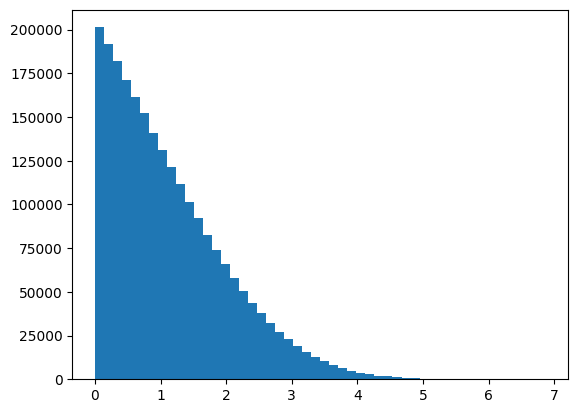

In [20]:
plt.hist(log_post_2018, bins=50)